In [1]:
# General / Common libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pyfolio as pf

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


# US Stocks

## Netflix

In [2]:
netflix_data = pdr.get_data_yahoo("NFLX", start="2009-01-01", end="2019-12-31")
netflix_close = netflix_data["Close"]
netflix_adj_close = netflix_data["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [3]:
# check if 10x

round((netflix_close.tail(1).values / netflix_close.head(1).values)[0], 3)

75.717

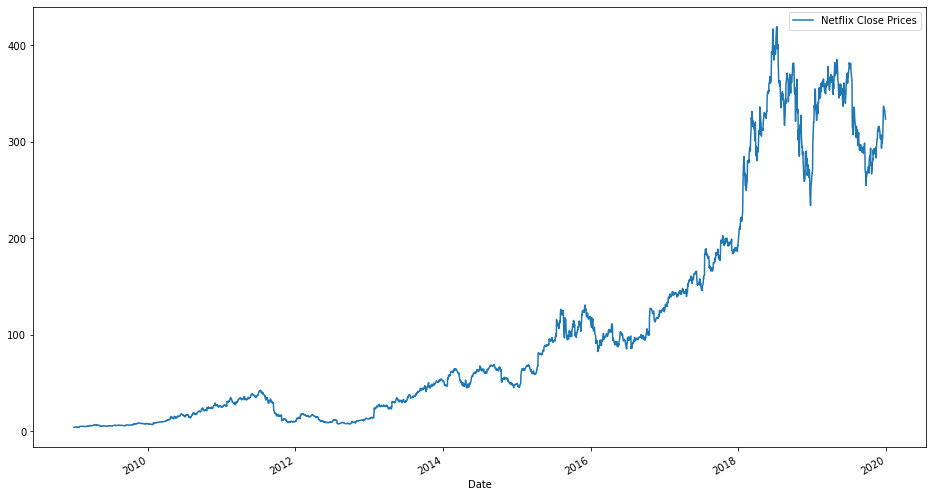

In [4]:
netflix_close.plot(label="Netflix Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [5]:
# pct change

netflix_pct_change = netflix_close.pct_change()
netflix_pct_change.head()

Date
2008-12-31         NaN
2009-01-02   -0.000669
2009-01-05    0.069300
2009-01-06    0.031309
2009-01-07   -0.006982
Name: Close, dtype: float64

In [6]:
# which day had the worst single day returns

netflix_pct_change.idxmin()

Timestamp('2011-10-25 00:00:00')

In [7]:
# which day had the best single day returns

netflix_pct_change.idxmax()

Timestamp('2013-01-24 00:00:00')

In [8]:
# std to assess risk

netflix_pct_change.std()

0.03244552989808973

In [9]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [10]:
netflix_sma_30 = netflix_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
netflix_wma_30 = netflix_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
netflix_ema_30 = netflix_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

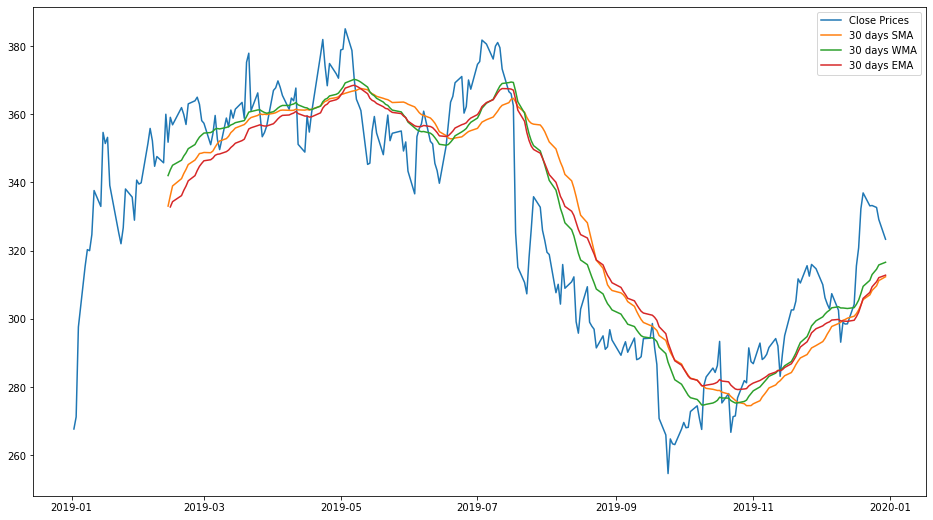

In [11]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(netflix_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(netflix_sma_30, label='30 days SMA')
ax.plot(netflix_wma_30, label='30 days WMA')
ax.plot(netflix_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [12]:
netflix_return_series = ((1 + netflix_adj_close.pct_change()).cumprod() - 1)
netflix_return_series

Date
2008-12-31          NaN
2009-01-02    -0.000669
2009-01-05     0.068585
2009-01-06     0.102041
2009-01-07     0.094346
                ...    
2019-12-23    77.009369
2019-12-24    77.032790
2019-12-26    76.899299
2019-12-27    76.070257
2019-12-30    74.716627
Name: Adj Close, Length: 2768, dtype: float64

In [13]:
netflix_annualized_return = ((1+netflix_return_series.tail(1))**(1/10))-1
netflix_annualized_return*100

Date
2019-12-30    54.141339
Name: Adj Close, dtype: float64

In [14]:
netflix_volatility = np.sqrt(np.log(netflix_close / netflix_close.shift(1)).var()) * np.sqrt(252)
netflix_volatility

0.5124949332666786

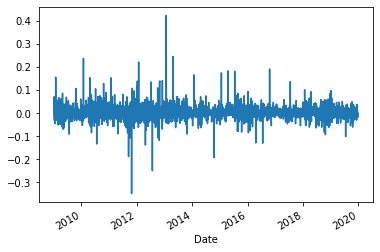

In [15]:
netflix_return_ts = netflix_adj_close.pct_change().dropna()
netflix_return_ts.plot()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-02
End date,2019-12-30
Total months,131
,Backtest
Annual return,48.3%
Cumulative returns,7471.7%
Annual volatility,51.5%
Sharpe ratio,1.02
Calmar ratio,0.59
Stability,0.91
Max drawdown,-82.0%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


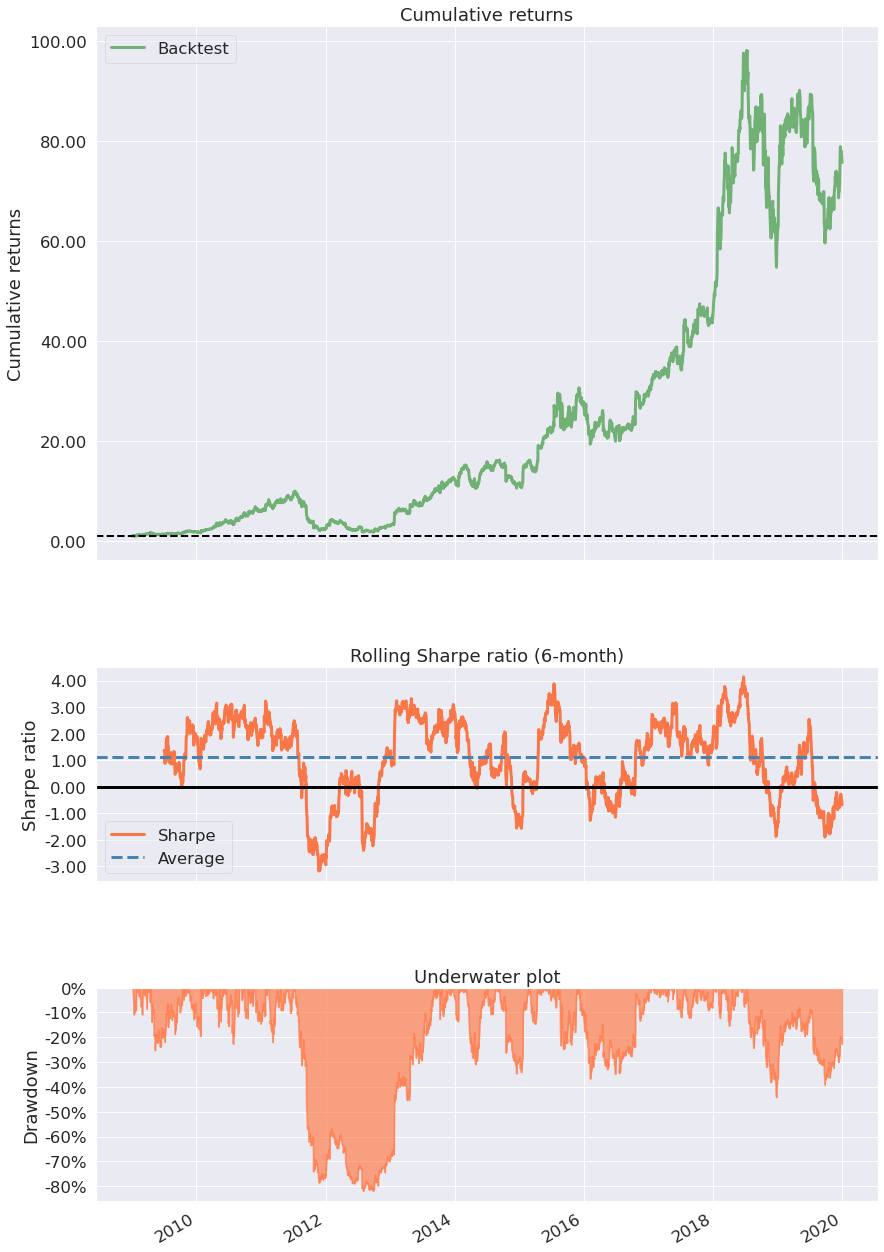

In [16]:
pf.create_simple_tear_sheet(netflix_return_ts)

## Salesforce

In [17]:
salesforce_data = pdr.get_data_yahoo("CRM", start="2009-01-01", end="2019-12-31")
salesforce_close = salesforce_data["Close"]
salesforce_adj_close = salesforce_data["Adj Close"]
salesforce_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2008-12-31    8.0025
2009-01-02    8.5050
2009-01-05    8.3375
2009-01-06    8.6500
2009-01-07    8.0000
Name: Close, dtype: float64

In [18]:
round((salesforce_close.tail(1).values / salesforce_close.head(1).values)[0], 3)

20.299

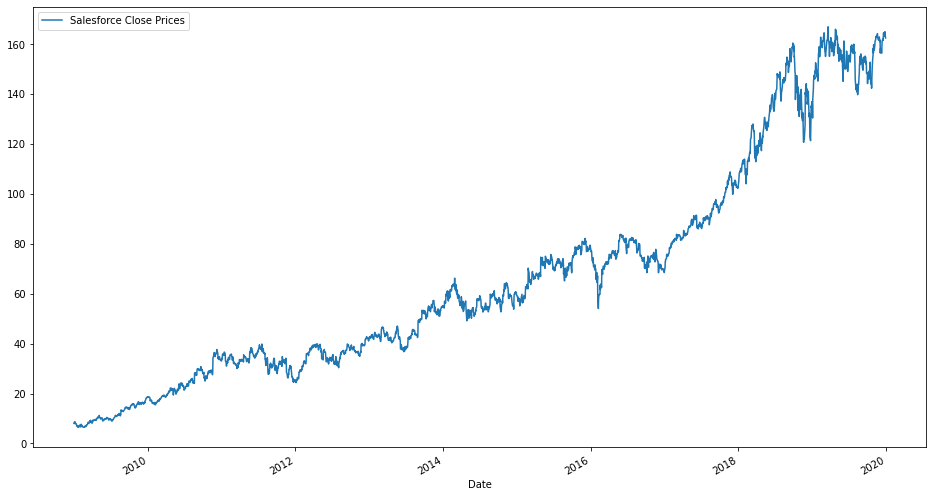

In [19]:
salesforce_close.plot(label="Salesforce Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [20]:
# pct change

salesforce_pct_change = salesforce_close.pct_change()
salesforce_pct_change.head()

Date
2008-12-31         NaN
2009-01-02    0.062793
2009-01-05   -0.019694
2009-01-06    0.037481
2009-01-07   -0.075144
Name: Close, dtype: float64

In [21]:
# which day had the worst single day returns

salesforce_pct_change.idxmin()

Timestamp('2016-02-05 00:00:00')

In [22]:
# which day had the best single day returns

salesforce_pct_change.idxmax()

Timestamp('2010-11-19 00:00:00')

In [23]:
# std to assess risk

salesforce_pct_change.std()

0.022597587383301886

In [24]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [25]:
salesforce_sma_30 = salesforce_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
salesforce_wma_30 = salesforce_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
salesforce_ema_30 = salesforce_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

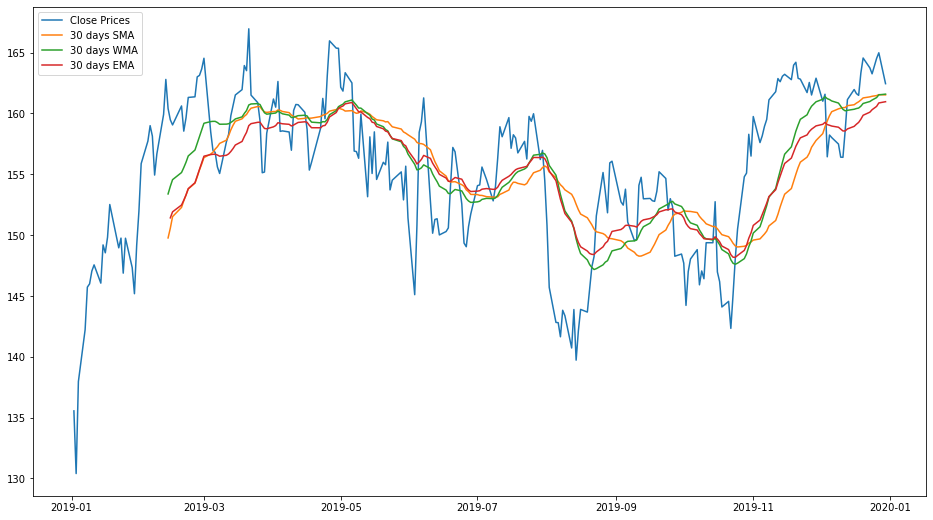

In [26]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(salesforce_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(salesforce_sma_30, label='30 days SMA')
ax.plot(salesforce_wma_30, label='30 days WMA')
ax.plot(salesforce_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [27]:
salesforce_return_series = ((1 + salesforce_adj_close.pct_change()).cumprod() - 1)
salesforce_return_series

Date
2008-12-31          NaN
2009-01-02     0.062793
2009-01-05     0.041862
2009-01-06     0.080912
2009-01-07    -0.000312
                ...    
2019-12-23    19.461108
2019-12-24    19.399876
2019-12-26    19.557326
2019-12-27    19.616058
2019-12-30    19.298658
Name: Adj Close, Length: 2768, dtype: float64

In [28]:
salesforce_annualized_return = ((1+salesforce_return_series.tail(1))**(1/10))-1
salesforce_annualized_return*100

Date
2019-12-30    35.128431
Name: Adj Close, dtype: float64

In [29]:
salesforce_volatility = np.sqrt(np.log(salesforce_close / salesforce_close.shift(1)).var()) * np.sqrt(252)
salesforce_volatility

0.35646187941696966

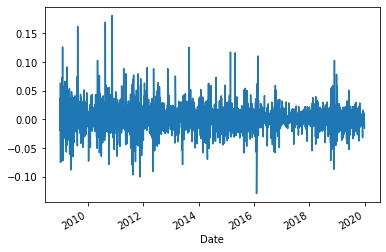

In [30]:
salesforce_return_ts = salesforce_adj_close.pct_change().dropna()
salesforce_return_ts.plot()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-02
End date,2019-12-30
Total months,131
,Backtest
Annual return,31.5%
Cumulative returns,1929.9%
Annual volatility,35.9%
Sharpe ratio,0.94
Calmar ratio,0.81
Stability,0.93
Max drawdown,-38.8%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


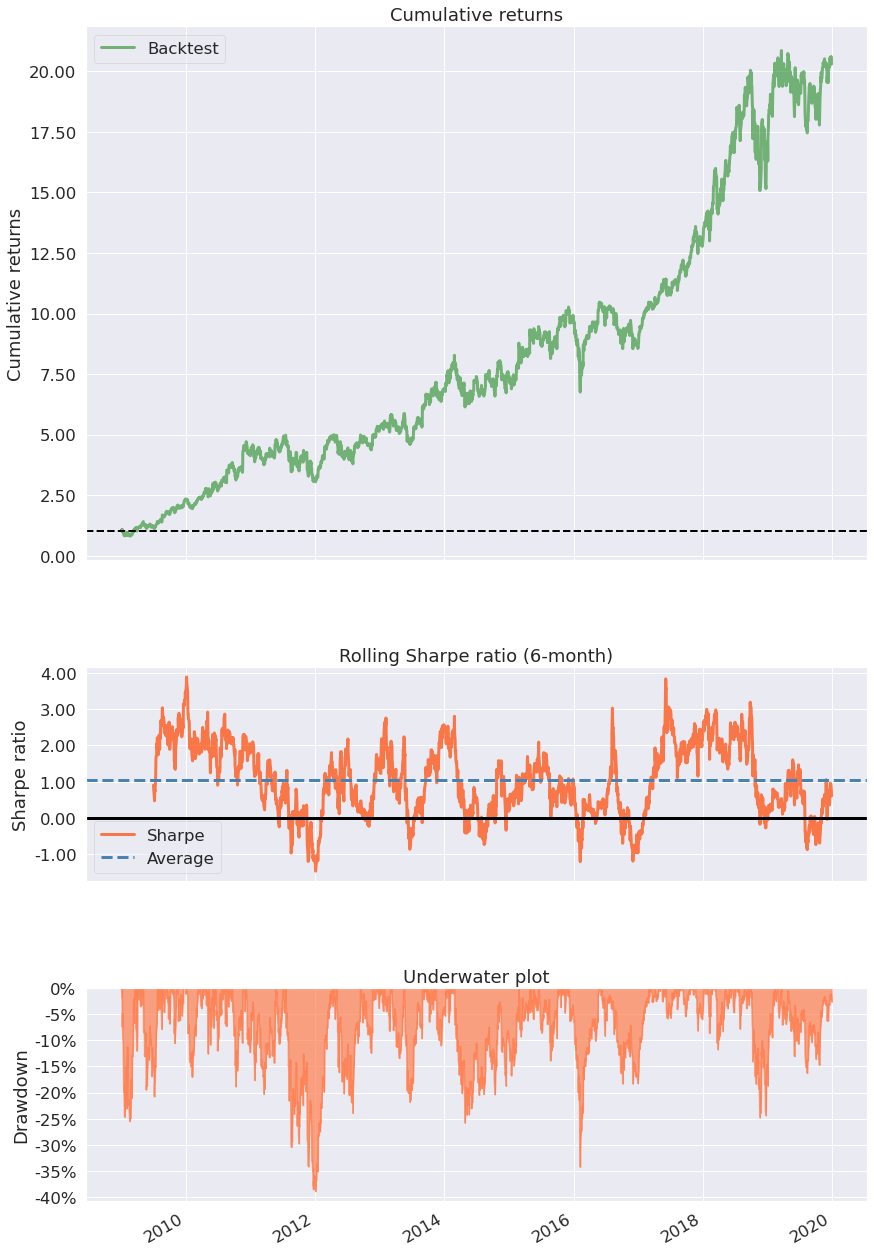

In [31]:
pf.create_simple_tear_sheet(salesforce_return_ts)

# SG Stocks

## DBS

In [32]:
dbs_data = pdr.get_data_yahoo("D05.SI", start="2009-01-01", end="2019-12-31")
dbs_close = dbs_data["Close"]
dbs_adj_close = dbs_data["Adj Close"]
dbs_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-02    8.69
2009-01-05    9.42
2009-01-06    9.56
2009-01-07    9.46
2009-01-08    8.99
Name: Close, dtype: float64

In [33]:
# check if 10x

round((dbs_close.tail(1).values / dbs_close.head(1).values)[0], 3)

2.972

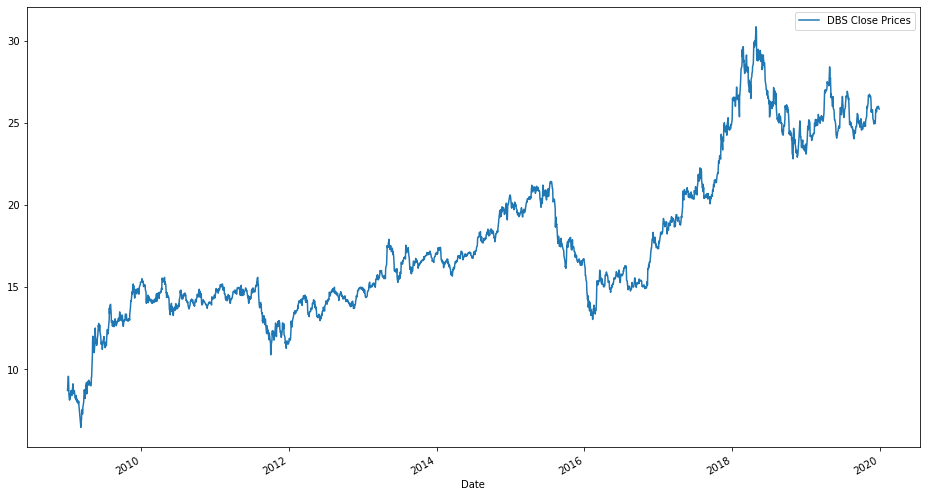

In [34]:
dbs_close.plot(label="DBS Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [35]:
# pct change

dbs_pct_change = dbs_close.pct_change()
dbs_pct_change.head()

Date
2009-01-02         NaN
2009-01-05    0.084005
2009-01-06    0.014862
2009-01-07   -0.010460
2009-01-08   -0.049683
Name: Close, dtype: float64

In [36]:
# which day had the worst single day returns

dbs_pct_change.idxmin()

Timestamp('2009-03-09 00:00:00')

In [37]:
# which day had the best single day returns

dbs_pct_change.idxmax()

Timestamp('2009-05-04 00:00:00')

In [38]:
# std to assess risk

dbs_pct_change.std()

0.012825750217097412

In [39]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [40]:
dbs_sma_30 = dbs_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
dbs_wma_30 = dbs_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
dbs_ema_30 = dbs_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

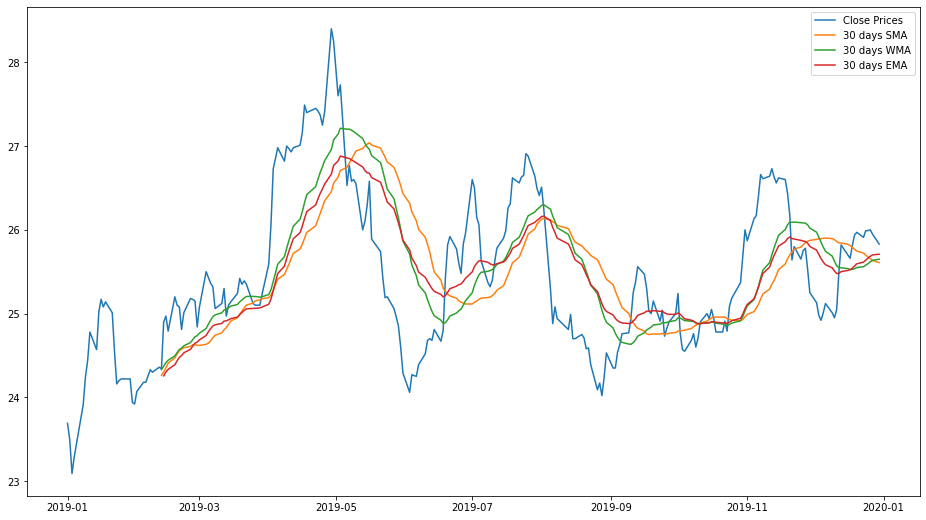

In [41]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(dbs_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(dbs_sma_30, label='30 days SMA')
ax.plot(dbs_wma_30, label='30 days WMA')
ax.plot(dbs_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [42]:
dbs_return_series = ((1 + dbs_adj_close.pct_change()).cumprod() - 1)
dbs_return_series

Date
2009-01-02         NaN
2009-01-05    0.084005
2009-01-06    0.100115
2009-01-07    0.088607
2009-01-08    0.034523
                ...   
2019-12-24    3.476412
2019-12-25    3.476412
2019-12-26    3.478135
2019-12-27    3.469523
2019-12-30    3.448855
Name: Adj Close, Length: 2760, dtype: float64

In [43]:
dbs_annualized_return = ((1+dbs_return_series.tail(1))**(1/10))-1
dbs_annualized_return*100

Date
2019-12-30    16.098022
Name: Adj Close, dtype: float64

In [44]:
dbs_volatility = np.sqrt(np.log(dbs_close / dbs_close.shift(1)).var()) * np.sqrt(252)
dbs_volatility

0.2030484188475756

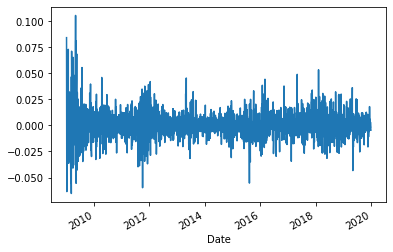

In [45]:
dbs_return_ts = dbs_adj_close.pct_change().dropna()
dbs_return_ts.plot()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-05
End date,2019-12-30
Total months,131
,Backtest
Annual return,14.6%
Cumulative returns,344.9%
Annual volatility,20.1%
Sharpe ratio,0.78
Calmar ratio,0.38
Stability,0.87
Max drawdown,-38.4%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


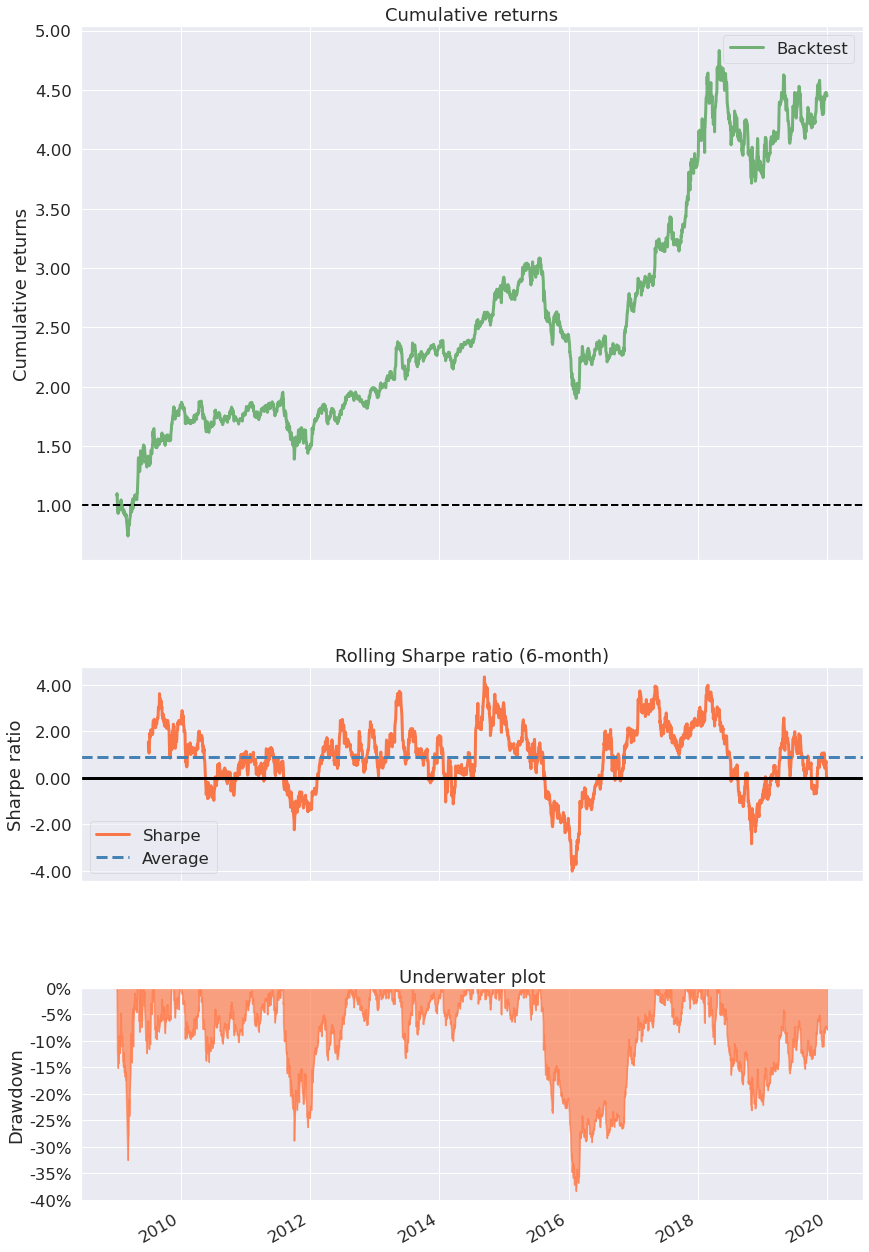

In [46]:
pf.create_simple_tear_sheet(dbs_return_ts)

## Jardine Matheson Holdings Limited 

In [47]:
JMHL_data = pdr.get_data_yahoo("J36.SI", start="2009-01-01", end="2019-12-31")
JMHL_close = JMHL_data["Close"]
JMHL_adj_close = JMHL_data["Adj Close"]
JMHL_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-02    18.340000
2009-01-05    19.480000
2009-01-06    20.139999
2009-01-07    20.780001
2009-01-08    20.000000
Name: Close, dtype: float64

In [48]:
# check if 10x

round((JMHL_close.tail(1).values / JMHL_close.head(1).values)[0], 3)

3.043

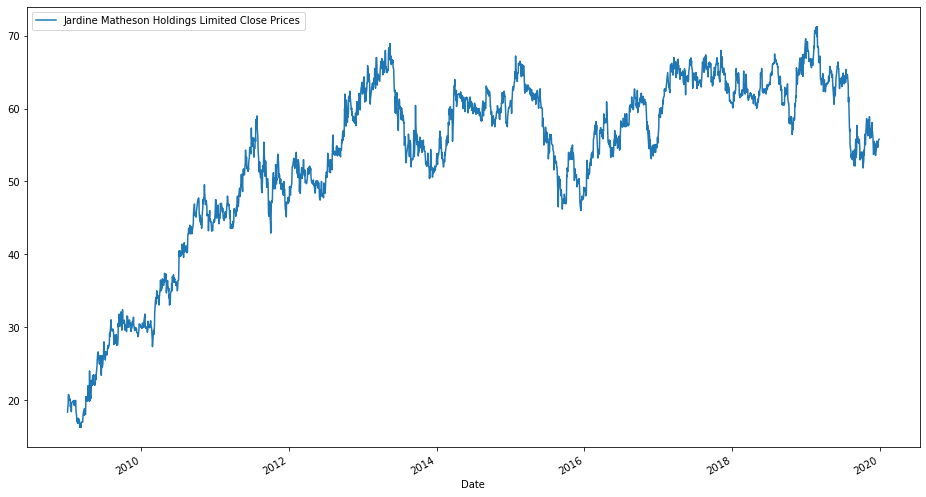

In [49]:
JMHL_close.plot(label="Jardine Matheson Holdings Limited Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [50]:
# pct change

JMHL_pct_change = JMHL_close.pct_change()
JMHL_pct_change.head()

Date
2009-01-02         NaN
2009-01-05    0.062159
2009-01-06    0.033881
2009-01-07    0.031778
2009-01-08   -0.037536
Name: Close, dtype: float64

In [51]:
# which day had the worst single day returns

JMHL_pct_change.idxmin()

Timestamp('2009-04-22 00:00:00')

In [52]:
# which day had the best single day returns

JMHL_pct_change.idxmax()

Timestamp('2009-04-21 00:00:00')

In [53]:
# std to assess risk

JMHL_pct_change.std()

0.017643280620419987

In [54]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [55]:
JMHL_sma_30 = JMHL_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
JMHL_wma_30 = JMHL_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
JMHL_ema_30 = JMHL_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

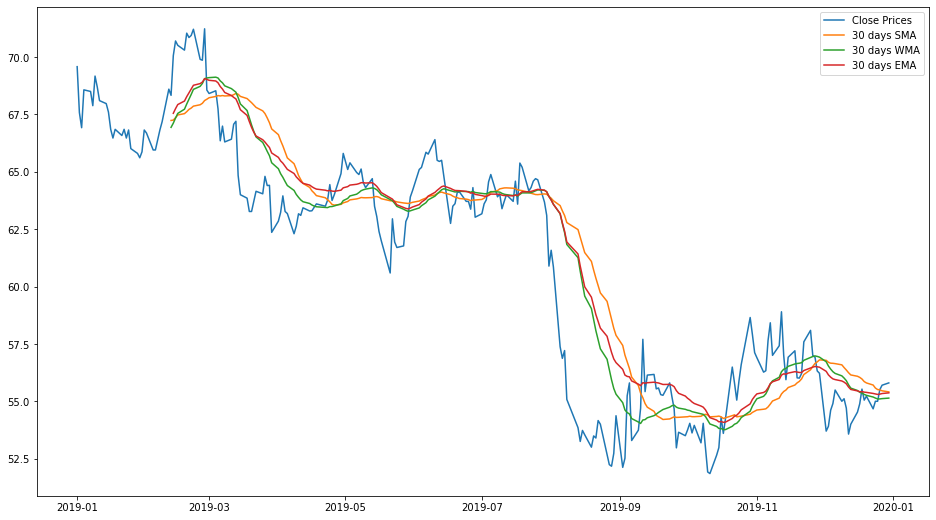

In [56]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(JMHL_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(JMHL_sma_30, label='30 days SMA')
ax.plot(JMHL_wma_30, label='30 days WMA')
ax.plot(JMHL_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [57]:
JMHL_return_series = ((1 + JMHL_adj_close.pct_change()).cumprod() - 1)
JMHL_return_series

Date
2009-01-02         NaN
2009-01-05    0.062159
2009-01-06    0.098146
2009-01-07    0.133043
2009-01-08    0.090513
                ...   
2019-12-24    3.171487
2019-12-25    3.171487
2019-12-26    3.210168
2019-12-27    3.224579
2019-12-30    3.232163
Name: Adj Close, Length: 2760, dtype: float64

In [58]:
JMHL_annualized_return = ((1+JMHL_return_series.tail(1))**(1/10))-1
JMHL_annualized_return*100

Date
2019-12-30    15.519749
Name: Adj Close, dtype: float64

In [59]:
JMHL_volatility = np.sqrt(np.log(JMHL_close / JMHL_close.shift(1)).var()) * np.sqrt(252)
JMHL_volatility

0.27923925092927904

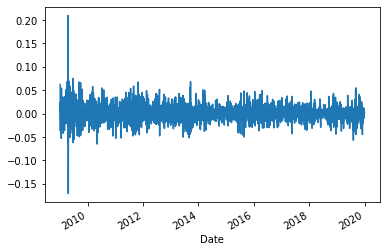

In [60]:
JMHL_return_ts =JMHL_adj_close.pct_change().dropna()
JMHL_return_ts.plot()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-05
End date,2019-12-30
Total months,131
,Backtest
Annual return,14.1%
Cumulative returns,323.2%
Annual volatility,28.0%
Sharpe ratio,0.61
Calmar ratio,0.47
Stability,0.71
Max drawdown,-29.8%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


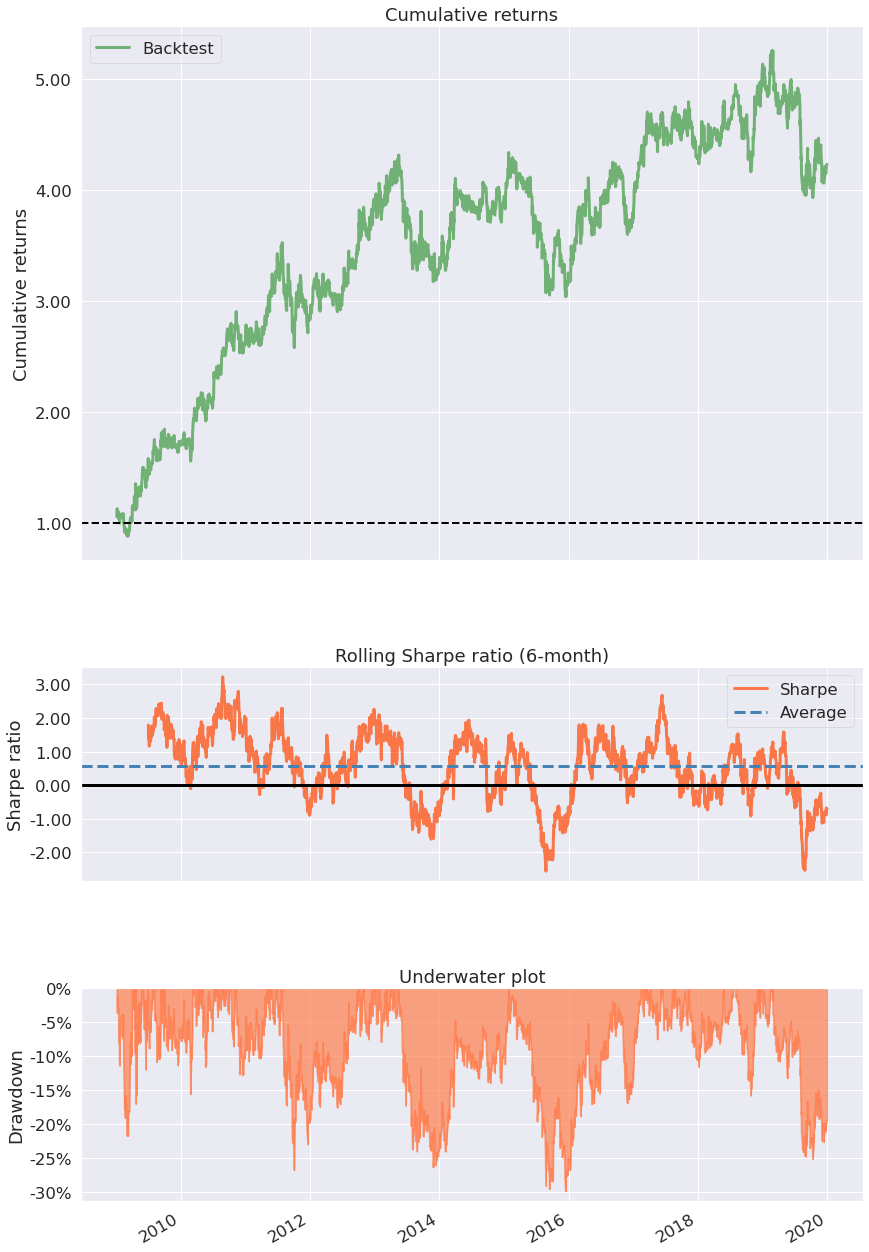

In [61]:
pf.create_simple_tear_sheet(JMHL_return_ts)

## Jardine Cycle & Carriage Limited

In [62]:
JCCL_data = pdr.get_data_yahoo("C07.SI", start="2009-01-01", end="2019-12-31")
JCCL_close = JCCL_data["Close"]
JCCL_adj_close = JCCL_data["Adj Close"]
JCCL_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-02     9.648444
2009-01-05    10.407092
2009-01-06    10.270924
2009-01-07    10.426544
2009-01-08    10.056947
Name: Close, dtype: float64

In [63]:
# check if 10x

round((JCCL_close.tail(1).values / JCCL_close.head(1).values)[0], 3)

3.135

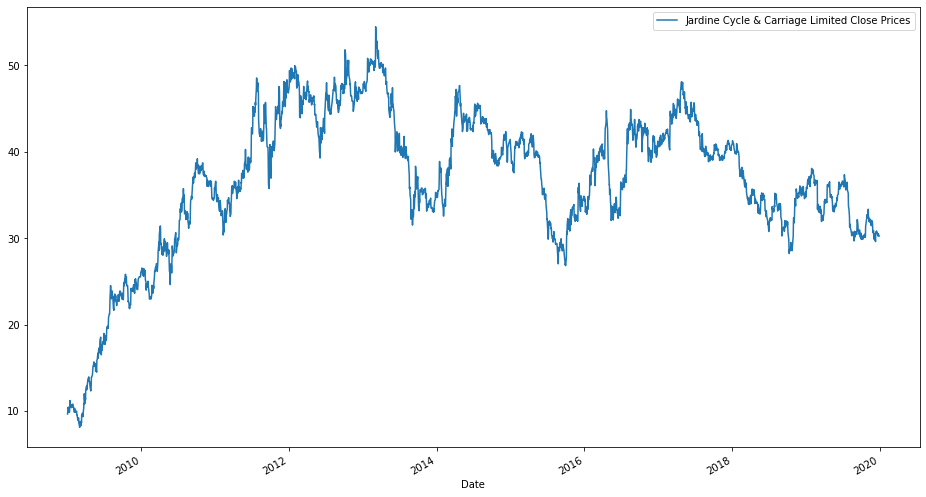

In [64]:
JCCL_close.plot(label="Jardine Cycle & Carriage Limited Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [65]:
# pct change

JCCL_pct_change = JCCL_close.pct_change()
JCCL_pct_change.head()

Date
2009-01-02         NaN
2009-01-05    0.078629
2009-01-06   -0.013084
2009-01-07    0.015152
2009-01-08   -0.035448
Name: Close, dtype: float64

In [66]:
# which day had the worst single day returns

JCCL_pct_change.idxmin()

Timestamp('2019-02-28 00:00:00')

In [67]:
# which day had the best single day returns

JCCL_pct_change.idxmax()

Timestamp('2009-03-26 00:00:00')

In [68]:
# std to assess risk

JCCL_pct_change.std()

0.018708617383999916

In [69]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [70]:
JCCL_sma_30 = JCCL_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
JCCL_wma_30 = JCCL_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
JCCL_ema_30 = JCCL_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

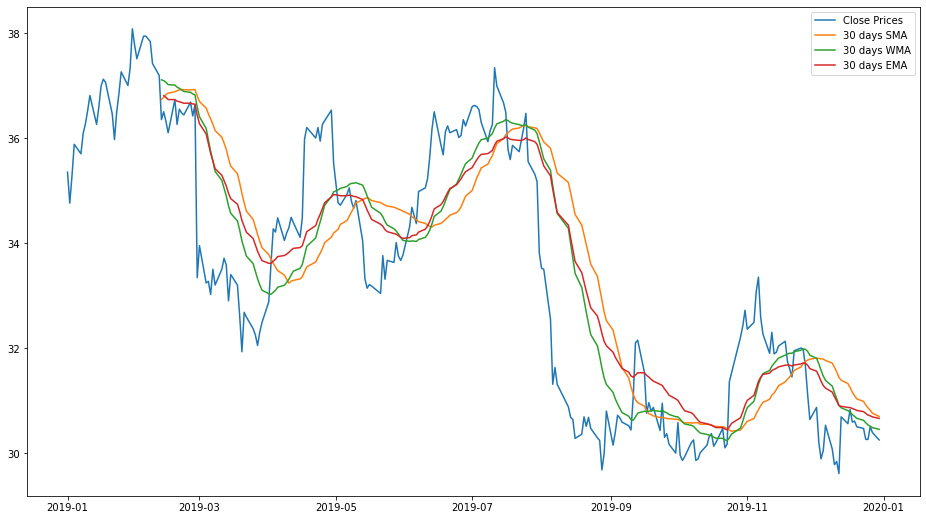

In [71]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(JCCL_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(JCCL_sma_30, label='30 days SMA')
ax.plot(JCCL_wma_30, label='30 days WMA')
ax.plot(JCCL_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [72]:
JCCL_return_series = ((1 + JCCL_adj_close.pct_change()).cumprod() - 1)
JCCL_return_series

Date
2009-01-02         NaN
2009-01-05    0.078629
2009-01-06    0.064516
2009-01-07    0.080645
2009-01-08    0.042339
                ...   
2019-12-24    3.183560
2019-12-25    3.183560
2019-12-26    3.216741
2019-12-27    3.201533
2019-12-30    3.182178
Name: Adj Close, Length: 2760, dtype: float64

In [73]:
JCCL_annualized_return = ((1+JCCL_return_series.tail(1))**(1/10))-1
JCCL_annualized_return*100

Date
2019-12-30    15.382581
Name: Adj Close, dtype: float64

In [74]:
JCCL_volatility = np.sqrt(np.log(JCCL_close / JCCL_close.shift(1)).var()) * np.sqrt(252)
JCCL_volatility

0.2953291766715619

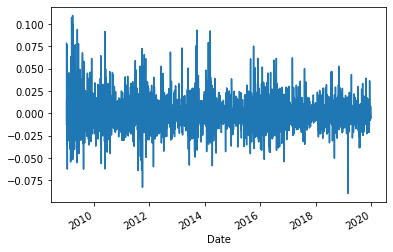

In [75]:
JCCL_return_ts =JCCL_adj_close.pct_change().dropna()
JCCL_return_ts.plot()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-05
End date,2019-12-30
Total months,131
,Backtest
Annual return,14.0%
Cumulative returns,318.2%
Annual volatility,29.7%
Sharpe ratio,0.59
Calmar ratio,0.30
Stability,0.30
Max drawdown,-47.0%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


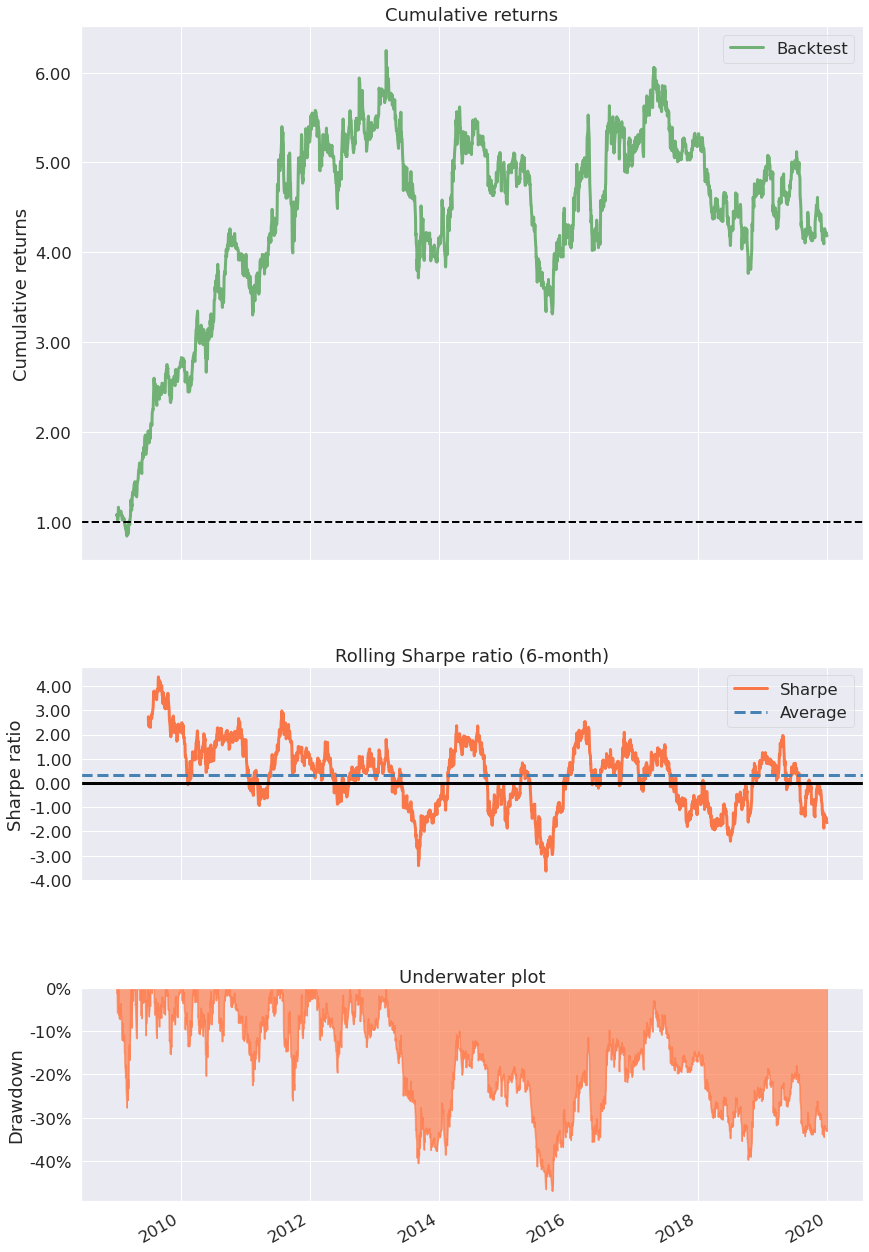

In [76]:
pf.create_simple_tear_sheet(JCCL_return_ts)